# Projekt LAB 1 Dane Facebook 
Maciej Klimiuk , Hanna Mika



In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics._regression import root_mean_squared_error




In [114]:
# Wczytaj dane
data = pd.read_csv("data.csv", sep=";")
# nowa kolumna o nazwie koszty = przychód - zysk 
data["Koszty w mln $"] = data["Przychód w mln $"] - data["Zysk w mln $"]
print(data)


    Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  Użytkownicy_mln  \
0  2009               777           229          1218              360   
1  2010              1974           606          2127              608   
2  2011              3711          1000          3200              845   
3  2012              5089            53          4619             1056   
4  2013              7872          1500          6337             1228   
5  2014             12466          2940          9199             1393   
6  2015             17928          3688         12691             1591   
7  2016             27638         10217         17048             1860   
8  2017             40653         15934         25105             2129   

   Koszty w mln $  
0             548  
1            1368  
2            2711  
3            5036  
4            6372  
5            9526  
6           14240  
7           17421  
8           24719  


In [115]:

# wszystkie korelacje
print(data.corr())


                       Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  \
Rok               1.000000          0.923356      0.834622      0.940966   
Przychód w mln $  0.923356          1.000000      0.977966      0.997977   
Zysk w mln $      0.834622          0.977966      1.000000      0.963747   
Zatrudnienie      0.940966          0.997977      0.963747      1.000000   
Użytkownicy_mln   0.997651          0.933496      0.852985      0.949059   
Koszty w mln $    0.959960          0.990269      0.939397      0.996427   

                  Użytkownicy_mln  Koszty w mln $  
Rok                      0.997651        0.959960  
Przychód w mln $         0.933496        0.990269  
Zysk w mln $             0.852985        0.939397  
Zatrudnienie             0.949059        0.996427  
Użytkownicy_mln          1.000000        0.964372  
Koszty w mln $           0.964372        1.000000  



Współczynniki modelu R^2:  0.7700608209738917
Współczynnik modelu RMSE: 20261911.233973883


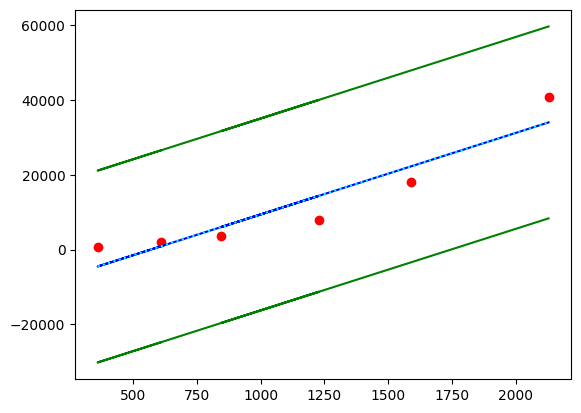

In [116]:

#1. Przychód (OY) od liczby użytkowników (OX)
# do POPRAWY
#model liniowy nr 2
print()
X_train, X_test, y_train, y_test = train_test_split(data[["Użytkownicy_mln"]], data["Przychód w mln $"], test_size=0.3, random_state=None)


model = LinearRegression()
model.fit(X_train, y_train)


# Prognozy i przedziały ufności dla danych pierwotnych
y_pred_test = model.predict(X_test)
y_pred_all = model.predict(data[["Użytkownicy_mln"]])

print("Współczynniki modelu R^2: ", model.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

#Dodanie prognoz na całym zbiorze 



#wykresy z predykcjami i przedziałami ufności 0.95
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')

# Dodanie prognoz na całym zbiorze w postaci linii (bez nakładania się)
plt.plot(data[["Użytkownicy_mln"]], y_pred_all, color = 'cyan', label='Prognozy na całym zbiorze', linestyle='dotted')

plt.plot(X_train, model.predict(X_train) + 1.96 * np.std(model.predict(X_train)), color = 'green')
plt.plot(X_train, model.predict(X_train) - 1.96 * np.std(model.predict(X_train)), color = 'green')
plt.show()


Współczynniki modelu R^2:  0.9914918640185186
Współczynnik modelu RMSE: 273547.8271231797


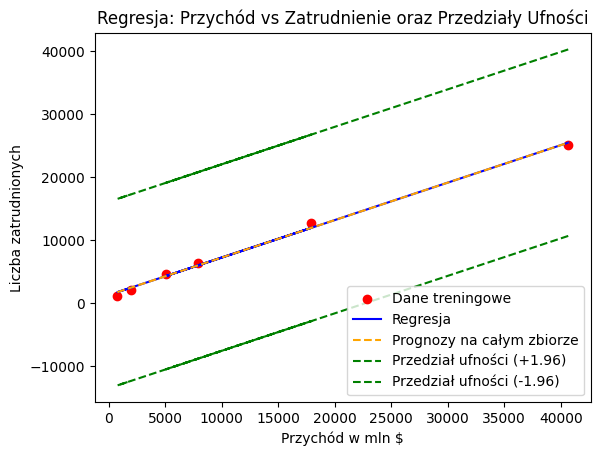

In [117]:
#3. Przychód(OX)  liczba pracowników (OY)

# DO POPRAWY

#model liniowy nr 2
# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(data[["Przychód w mln $"]], data["Zatrudnienie"], test_size=0.3, random_state=None)

# Trenowanie modelu
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Prognozy dla danych testowych
y_pred_test = model2.predict(X_test)

# Prognozy dla wszystkich danych
y_pred_all = model2.predict(data[["Przychód w mln $"]])

# Obliczenie współczynnika R^2 oraz RMSE
print("Współczynniki modelu R^2: ", model2.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

# Wykres
plt.scatter(X_train, y_train, color = 'red', label='Dane treningowe')
plt.plot(X_train, model2.predict(X_train), color = 'blue', label='Regresja')

# Dodanie prognoz na całym zbiorze 
plt.plot(data[["Przychód w mln $"]], y_pred_all, color = 'orange',  linestyle='dashed', label='Prognozy na całym zbiorze')

# Obliczanie przedziału ufności na poziomie 0.95
# Zakładając, że rozkład błędów jest normalny, można dodać ±1.96 odchylenia standardowego od prognoz
std_error = np.std(y_pred_all)
plt.plot(X_train, model2.predict(X_train) + 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (+1.96)')
plt.plot(X_train, model2.predict(X_train) - 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (-1.96)')

# Dodanie legendy i tytułów
plt.legend()
plt.xlabel("Przychód w mln $")
plt.ylabel("Liczba zatrudnionych")
plt.title("Regresja: Przychód vs Zatrudnienie oraz Przedziały Ufności")
plt.show()




Współczynniki modelu R^2:  0.9926223072635293
Współczynnik modelu RMSE: 818852.2022487029


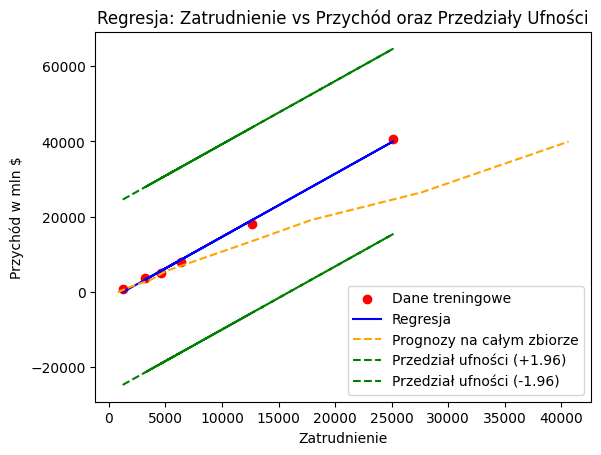

In [118]:
#4. Liczba pracowników (OX) przychód(OY)

X_train, X_test, y_train, y_test = train_test_split(data[["Zatrudnienie"]], data["Przychód w mln $"], test_size=0.3, random_state=42)
model3 = LinearRegression()
model3.fit(X_train, y_train)

# Trenowanie modelu
model3 = LinearRegression()
model3.fit(X_train, y_train)

# Prognozy dla danych testowych
y_pred_test = model3.predict(X_test)

# Prognozy dla wszystkich danych
y_pred_all = model3.predict(data[["Zatrudnienie"]])

# Obliczenie współczynnika R^2 oraz RMSE
print("Współczynniki modelu R^2: ", model3.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

# Wykres
plt.scatter(X_train, y_train, color = 'red', label='Dane treningowe')
plt.plot(X_train, model3.predict(X_train), color = 'blue', label='Regresja')

# Dodanie prognoz na całym zbiorze
plt.plot(data[["Przychód w mln $"]], y_pred_all, color = 'orange', linestyle='dashed', label='Prognozy na całym zbiorze')

# Obliczanie przedziału ufności na poziomie 0.95
# Zakładając, że rozkład błędów jest normalny, można dodać ±1.96 odchylenia standardowego od prognoz
std_error = np.std(y_pred_all)
plt.plot(X_train, model3.predict(X_train) + 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (+1.96)')
plt.plot(X_train, model3.predict(X_train) - 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (-1.96)')

# Dodanie legendy i tytułów
plt.legend()
plt.xlabel("Zatrudnienie")
plt.ylabel("Przychód w mln $")
plt.title("Regresja: Zatrudnienie vs Przychód oraz Przedziały Ufności")
plt.show()


Współczynniki modelu R^2:  0.7890918399338533
Współczynnik modelu RMSE: 4644.6195009766825


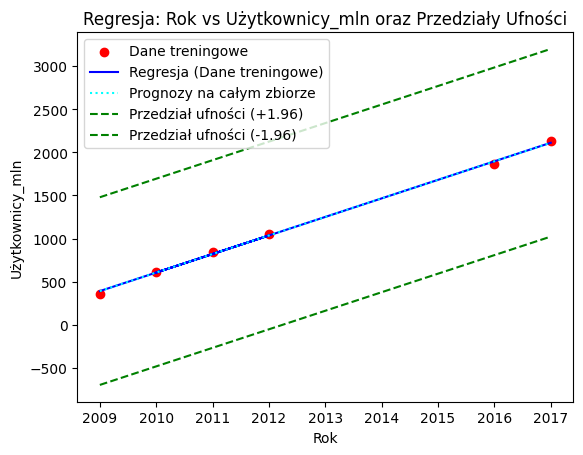

In [119]:
#5. Liczba użytkowników (OY) od czasu (OX)

X_train, X_test, y_train, y_test = train_test_split(data[["Rok"]], data["Użytkownicy_mln"], test_size=0.3, random_state=None)


# Trenowanie modelu
model4 = LinearRegression()
model4.fit(X_train, y_train)

# Prognozy dla danych testowych
y_pred_test = model4.predict(X_test)

# Prognozy dla wszystkich danych
y_pred_all = model4.predict(data[["Rok"]])

# Obliczenie współczynnika R^2 oraz RMSE
print("Współczynniki modelu R^2: ", model4.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))


# Wykres
plt.scatter(X_train, y_train, color = 'red', label='Dane treningowe')
plt.plot(X_train, model4.predict(X_train), color = 'blue', label='Regresja (Dane treningowe)')

# Dodanie prognoz na całym zbiorze w postaci linii (bez nakładania się)
plt.plot(data[["Rok"]], y_pred_all, color = 'cyan', label='Prognozy na całym zbiorze', linestyle='dotted')

# Obliczanie przedziału ufności na poziomie 0.95
# Zakładając, że rozkład błędów jest normalny, można dodać ±1.96 odchylenia standardowego od prognoz
std_error = np.std(y_pred_all)
plt.plot(data[["Rok"]], model4.predict(data[["Rok"]]) + 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (+1.96)')
plt.plot(data[["Rok"]], model4.predict(data[["Rok"]]) - 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (-1.96)')

#  Dodanie legendy i tytułów
plt.legend()
plt.xlabel("Rok")
plt.ylabel("Użytkownicy_mln")
plt.title("Regresja: Rok vs Użytkownicy_mln oraz Przedziały Ufności")


plt.show()






Współczynniki modelu R^2:  -8.782722273739015
Współczynnik modelu RMSE: 0.5078858882170857
Prognozy kosztów na lata 2019-2021:
    Rok  Prognoza_Koszty
0  2018        10.826766
1  2019        11.273834
2  2020        11.720902
3  2021        12.167970


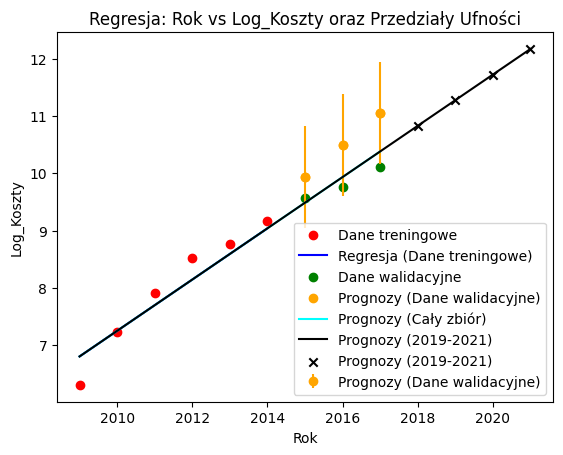

In [125]:
# Logarytmiczna transformacja kosztów i zysków
# dane treningowe to pierwsze 6 lat, a dane waliacyjne to ostatnie 3 lata
#Najpierw trenujemy model na danych treningowych, a następnie przewidujemy wartości dla danych walidacyjnych
#Dane walidacyjne są używane do oceny jakości modelu
#Następnie przewidujemy wartości dla całego zbioru danych, aby zobaczyć, jak model zachowuje się na całym zbiorze danych
#Jeśli model jest dobry, to prognozy dla danych walidacyjnych i całego zbioru danych powinny być zbliżone do siebie
#Następnie robimy przewidywania dla lat od 2019 do 2021

# Logarytmiczna transformacja kosztów i zysków
data["Log_Koszty"] = np.log(data["Koszty w mln $"])
data["Log_Zysk"] = np.log(data["Zysk w mln $"])

X_train= data[["Rok"]][:6]
X_test = data[["Rok"]][6:]
y_train = data["Log_Koszty"][:6]
y_test = data["Log_Koszty"][6:]

# Trenowanie modelu
model5 = LinearRegression()
model5.fit(X_train, y_train)

# Prognozy dla danych walidacyjnych
y_pred_test = model5.predict(X_test)

#Ocena jakości modelu
print("Współczynniki modelu R^2: ", model5.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

# Uczenie modelu na całym zbiorze danych
model5.fit(data[["Rok"]], data["Log_Koszty"])
data["Prognoza_Koszty"] = model5.predict(data[["Rok"]])

# Przewidywanie kosztów dla lat 2019-2021
X_future = pd.DataFrame({"Rok": [2018, 2019, 2020, 2021]})
data_future = pd.concat([data, X_future], axis=0)
data_future["Prognoza_Koszty"] = model5.predict(data_future[["Rok"]])

# wypisanie wartości prognozowanych kosztów
print("Prognozy kosztów na lata 2019-2021:")
print(data_future[["Rok", "Prognoza_Koszty"]][9:])

# Wykres
plt.scatter(X_train, y_train, color = 'red', label='Dane treningowe')
plt.plot(X_train, model5.predict(X_train), color = 'blue', label='Regresja (Dane treningowe)')
plt.scatter(X_test, y_test, color = 'green', label='Dane walidacyjne')
#punkty prognozowane wraz z przedziałami ufności pionowymi 0.95
plt.errorbar(X_test, y_pred_test, yerr=1.96 * np.std(y_pred_test), fmt='o', color = 'orange', label='Prognozy (Dane walidacyjne)')
plt.scatter(X_test, y_pred_test, color = 'orange', label='Prognozy (Dane walidacyjne)')
plt.plot(data[["Rok"]], data["Prognoza_Koszty"], color = 'cyan', label='Prognozy (Cały zbiór)')
plt.plot(data_future[["Rok"]], data_future["Prognoza_Koszty"], color = 'black', label='Prognozy (2019-2021)')
#punkty prognozowane
plt.scatter(data_future[["Rok"]][9:], data_future["Prognoza_Koszty"][9:], color = 'black', label='Prognozy (2019-2021)', marker='x')
plt.legend()
plt.xlabel("Rok")
plt.ylabel("Log_Koszty")
plt.title("Regresja: Rok vs Log_Koszty oraz Przedziały Ufności")
plt.show()


# zmienic zeby dane testowe trzeba wyliczyć samemu z funkcji a te uzyc całkowicie do wytrainowania modelu


In [121]:
# wykresy

fig = px.scatter_matrix(data)
fig.show()
 